<a href="https://colab.research.google.com/github/JS0501/ESAA_OB/blob/main/%EC%9B%94%EA%B0%84_%EB%8D%B0%EC%9D%B4%EC%BD%98_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EC%82%AC%EC%9A%A9%EC%9E%90_%EC%97%B0%EC%B2%B4_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dacon.io/competitions/official/235713/codeshare/2476

### **1. 주제 및 데이터**
#### **배경**
#### 신용카드사는 신용카드 신청자가 제출한 개인 정보와 데이터를 활용해 신용 점수를 산정한다. 신용카드사는 이 신용 점수를 활용해 신청자의 향후 채무 불이행과 신용카드 대금 연체 가능성을 예측한다. 현재 많은 금융 업계는 AI를 활용한 금융 서비스를 구현하고자 한다.

#### **주제**
#### 신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발

#### **데이터**
#### - train.csv: 신용카드 사용자들의 개인 신상 정보, credit열 포함 (26457,20)
#### - test.csv: 신용카드 사용자들의 개인 신상 정보, credit열 미포함 (10000,19)
#### - sample_submission.csv: 정답 제출 파일 (10000,4)

### **2. 코드 분석**
#### **전처리**
#### 1) 훈련에 필요없는 index 컬럼 삭제
#### 2) missing value를 모두 NAN 문자열로 대체
#### 3) dtype object인 컬럼을 one-hot encoding


#### **모델 적합**
#### **train**
#### 1) StratifiedKFold를 사용하여 y값 분포를 비슷하게 분리시킴 (5-fold)
#### 2) lightgbm의 default parameter로 훈련
#### 3) 30번 이상 개선 없을 경우 중단
#### 4) 각 5개의 fold를 훈련하여 저장
#### **test**
#### 1) 각 fold를 훈련시킨 lightgbm model로 predict
#### 2) 해당 대회는 logloss score를 겨루는 것이기에 각 class의 probability를 얻어야 함
#### 3) 대부분의 머신러닝 모델에서 predict, predict_proba를 구분하여 사용함
#### 4) predict는 class를, predict_proba는 class별 probability를 출력
#### 5) predict_proba를 사용하여 예측한 것을 5-fold를 더하여 평균내어 앙상블


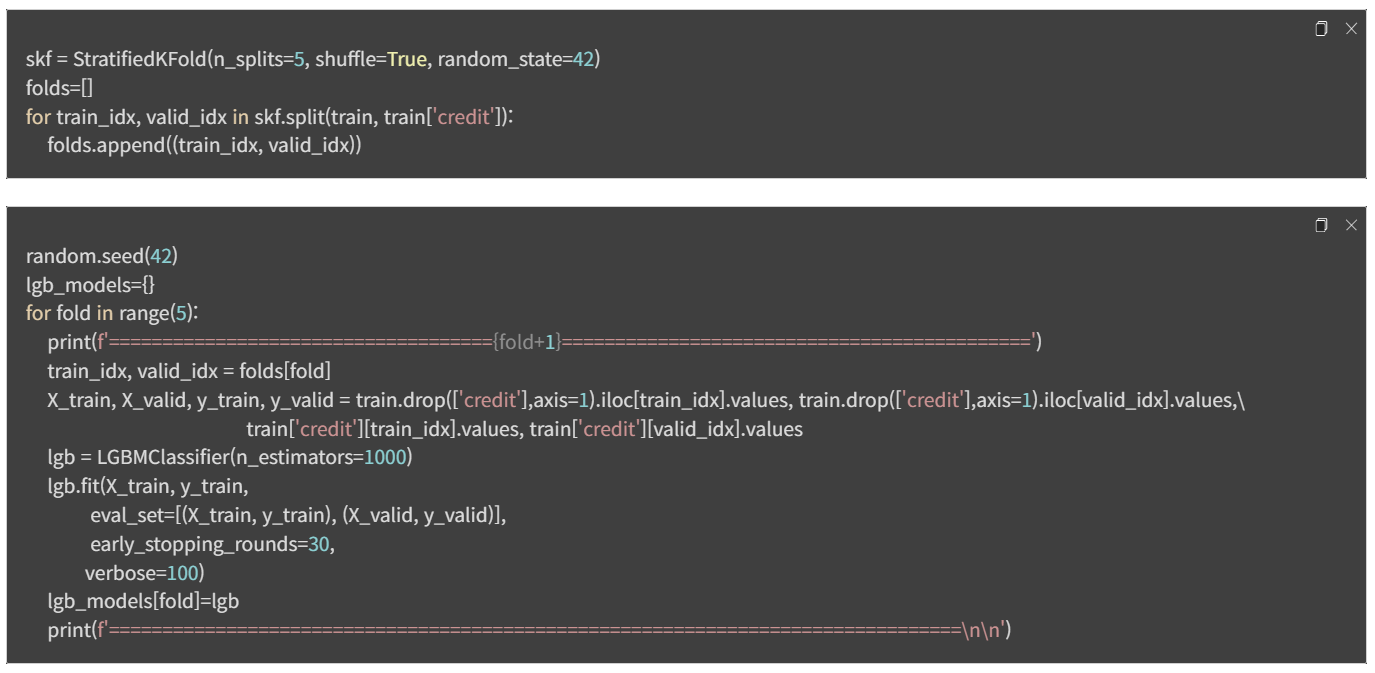

### **3. 차별점 및 배울점**
#### **차별점**
#### - Stratified K fold를 이용
#### - Stratified K-Fold는 일반 K-Fold와 달리 각 폴드에 클래스 비율을 원래 데이터셋과 유사하게 유지 (클래스 불균형 문제 완화, 모델 성능 평가의 안정성, 소수 클래스의 대표성 보장, 일반화 성능 추정의 개선)
#### **배울점**
#### 대회의 평가 지표인 los loss에 맞춘 모델 적합
#### Log Loss는 모델이 단순히 맞는지 틀린지 (accuracy)만 보는 게 아니라, 얼마나 확신있게 맞췄는지를 평가하는 지표
#### * predict -> 최종 클래스(label)만 출력 (최종 답)
#### * predict_proba -> 각 클래스에 속할 확률을 벡터로 반환 (답을 내기 전의 확률 근거)
#### 이 대회는 단순 분류 정확도만 필요한게 아니라 logloss 대회라 확률 분포가 필요하여 predict_proba 사용